<center>
    <h1><font color=darkred>Machine learning in action </font></h1>
    <h1><font color=darkred> EDA </font></h1>
    <h3>Le Hai Phu</h3>
    <h4>Student name:    </h4>
    <hr>
    <h1>Lab 1: Exploratory Data Analysis and Feature Engineering</h1>
    <h3>July 2024</h3>
</center





# Introduction
Lab1 aims to get you being comfortable with the processes of data cleaning and feature engineering  to modify the messy data sets

**By the end of this lab you will be able to:**
- learn how to approach and analyze a dataset
- learn how to use ML packages

# Exploratory Data Analysis

The files to be loaded are referring `Supply Chain Shipment Pricing Dataset` which provides supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries. There are 2 files to load including different information, coming from different sources.

The data set provides the commodity pricing and associated supply chain expenses necessary to move the commodities to countries for use.

The dataset has similar fields to the Global Fund's Price, Quality and Reporting (PQR) data. PEPFAR (President's Emergency Plan for AIDS Relief) and the Global Fund represent the two largest procurers of HIV health commodities. When it is analyzed in conjunction with the PQR data, it provides a more complete picture of global spending on specific health commodities.

The data are particularly valuable for understanding ranges and trends in pricing as well as volumes delivered by country.


## Import libraries and data
Import `numpy`, `pandas`, `seaborn` and `matplotlib.pyplot`

In [ ]:
#Import the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# check your version and if you have difficulties please talk with the instructor.
import sys
print(sys.version)

3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]


## Loading the data

In this recitation, we'll be using `SCMS_Delivery1.csv` and `SCMS_Delivery2.csv` files. Those two different files are coming from different sources. Hence, we'll load the datasets one by one to the Jupyter Notebook environment. The dictionary which refers all data is as follows:


|Feature Name    |Definition                                                                                 |Type     |
|:--------------:|:------------------------------------------------------------------------------------------|:--------|
|ID              |Primary key indentifer of the line of data in our analytical tool                          |*Numeric*|
|Project Code    |Project code                                                                               |*Text*   |
|PQ #            |Price quote (PQ) number                                                                    |*Text*   |
|PO #            |Order number-Purchase order (PO) for Direct Drop deliveries,or Sales Order (SO) for from Regional Delivery Center (RDC) deliveries                                                                                      |*Text*   |
|ASN/DN #        |Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery      |*Text*   |
|Country         |Destination country                                                                        |*Text*   |
|Managed By |SCMS managing office- either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office                                                                                                                  |*Text*   |
|Fulfill Via     |Method through which the shipment was fulfilled: via Direct Drop from vendor or from stock available in the RDCs                                                                                                         |*Text*   |
|Vendor INCO Term|The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries                                                                                                                            |*Text*   |
|Shipment Mode               |Method by which commodities are shipped                                      |*Text*    |
|PQ First Sent to Client Date|Date the PQ is first sent to the client                                      |*Date/Time* |
|PO Sent to Vendor Date      |Date the PO is first sent to the vendor                                      |*Date/Time* |
|Scheduled Delivery Date     |Current anticipated delivery date                                            |*Date/Time* |
|Delivered to Client Date    |Date of delivery to client                                                   |*Date/Time* |
|Delivery Recorded Date      |Date on which delivery to client was recorded in SCMS information systems    |*Date/Time* |
|Product Group               |Product group for item-i.e. ARV, HRDT	ACT, ANTM, ARV, HRDT, MRDT only      |*Text*   |
|Sub Classification          |Identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.                            |*Text*   |
|Vendor                      |Vendor name                                                                  |*Text*   |
|Item Description            |Product name and formulation from Partnership for Supply Chain Management (PFSCM) Item Master                                                                                                                |*Text*   |
|Molecule/Test Type          |Active drug(s) or test kit type                                              |*Text*   |
|Brand                       |Generic or branded name for the item                                         |*Text*   |
|Dosage                      |Item dosage and unit                                                         |*Text*   |
|Dosage Form                 |Dosage form for the item (tablet, oral solution, injection, etc.)            |*Text*   |
|Manufacturing Site          |Identifies manufacturing site for the line item for direct drop and from RDC deliveries                                                                                                                      |*Text*   |
|First Line Designation      |Designates if the line in question shows the aggregated freight costs and weight associated with  all items on the ASN/DN,                                                                                   |*Binary*|
|Unit of Measure (Per Pack)  |Pack quantity (pills or test kits) used to compute unit price                |*Numeric*|
|Line Item Quantity          |Total quantity (packs) of commodity per line item                            |*Numeric*|
|Line Item Value             |Total value of commodity per line item                                       |*Currency (USD)*|
|Unit Price                  |Cost per pill (for drugs) or per test (for test kits)                        |*Currency (USD)*|
|Weight (Kilograms)          |Weight for all lines on an ASN/DN                                            |*Numeric*|
|Freight Cost (USD)          |Freight charges associated with all lines on the respective ASN/DN           |*Currency (USD)*|
|Line Item Insurance (USD)   |Line item cost of insurance                                                  |*Currency (USD)*|
|||




Load the dataset`SCMS_Dataset1` and store it in a **`df1`** DataFrame object.

In [7]:
df1 = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/SCMS_Delivery1.csv", encoding='latin-1')
df1.head()       # prints the first 5 rows of the dataframe


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule


Check which columns are being held in `df1`

In [8]:
df1.columns.values

array(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage', 'Dosage Form'], dtype=object)

Check the `shape`, `data types` and `columns` for this dataframe.

In [9]:
print(df1.shape)
df1.dtypes

(10324, 23)


ID                               int64
Project Code                    object
PQ #                            object
PO / SO #                       object
ASN/DN #                        object
Country                         object
Managed By                      object
Fulfill Via                     object
Vendor INCO Term                object
Shipment Mode                   object
PQ First Sent to Client Date    object
PO Sent to Vendor Date          object
Scheduled Delivery Date         object
Delivered to Client Date        object
Delivery Recorded Date          object
Product Group                   object
Sub Classification              object
Vendor                          object
Item Description                object
Molecule/Test Type              object
Brand                           object
Dosage                          object
Dosage Form                     object
dtype: object

The first dataset only includes the first 23 features. In order to build an entire dataset for building a model, we need to get more data from different sources.

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Read the `SCMS_Delivery2.csv` file and name it as `df2`. Inspect of this new dataframe regarding shape and datatypes in each column.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Write the code for loading the new dataframe here as df2 and check its dimension and datatypes

#-------------------------------------------
df2 = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/SCMS_Delivery2.csv", encoding='latin-1')
df2.head(10)
#-------------------------------------------
#df2.columns.values
#-------------------------------------------
#print(df2.shape)
# df2.dtypes


,ID,Manufacturing Site,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,Ranbaxy Fine Chemicals LTD,Yes,30,19,551.00,0.97,13,NaN,780.34
1,3,"Aurobindo Unit III, India",Yes,240,1000,6200.00,0.03,358,NaN,4521.5
2,4,ABBVIE GmbH & Co.KG Wiesbaden,Yes,100,500,40000.00,0.80,171,NaN,1653.78
3,15,"Ranbaxy, Paonta Shahib, India",Yes,60,31920,127360.80,0.07,1855,NaN,16007.06
4,16,"Aurobindo Unit III, India",Yes,60,38000,121600.00,0.05,7590,NaN,45450.08
5,23,"Aurobindo Unit III, India",Yes,240,416,2225.60,0.02,504,NaN,5920.42
6,44,MSD South Granville Australia,Yes,90,135,4374.00,0.36,328,NaN,Freight Included in Commodity Cost
7,45,"Aurobindo Unit III, India",Yes,60,16667,60834.55,0.06,1478,NaN,6212.41
8,46,"Aurobindo Unit III, India",No,60,273,532.35,0.03,See ASN-93 (ID#:1281),NaN,See ASN-93 (ID#:1281)
9,47,ABBVIE (Abbott) St. P'burg USA,Yes,120,2800,115080.00,0.34,643,NaN,Freight Included in Commodity Cost


In [11]:
# Checking for duplicate rows
duplicate_rows = df2.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Removing duplicate rows
df2.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [12]:
print(df2.isnull().sum())

ID                              0
Manufacturing Site              0
First Line Designation          0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Unit Price                      0
Weight (Kilograms)              0
Line Item Insurance (USD)     287
Freight Cost (USD)              0
dtype: int64


In [13]:
df2['Line Item Insurance (USD)'].fillna(df2['Line Item Insurance (USD)'].mean(), inplace=True)  # Example of filling with mean
df2.isnull().sum()


ID                            0
Manufacturing Site            0
First Line Designation        0
Unit of Measure (Per Pack)    0
Line Item Quantity            0
Line Item Value               0
Unit Price                    0
Weight (Kilograms)            0
Line Item Insurance (USD)     0
Freight Cost (USD)            0
dtype: int64

In [14]:
df2['Weight (Kilograms)'] = pd.to_numeric(df2['Weight (Kilograms)'], errors='coerce')
df2['Freight Cost (USD)'] = pd.to_numeric(df2['Freight Cost (USD)'], errors='coerce')


In [15]:
df2.isnull().sum()

ID                               0
Manufacturing Site               0
First Line Designation           0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Unit Price                       0
Weight (Kilograms)            3952
Line Item Insurance (USD)        0
Freight Cost (USD)            4126
dtype: int64

## Exploring the data
Data pre-processing is the first step to identify and correct the raw data before the analysis.
It is always useful to **check** the following:

- concatenate, merge or join the objects/data coming from different resources if needed
- the structure of dataframe regarding the dimension, columns and data types included
- remove the redundant columns/attributes
- invalid values (negative, text, missing)
- consistency or formatting of characters (mix of categorical and numeric features)
- having human error(invalid date formats)
- mismatch between the observation (rows, columns)


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Look through the dataframe to recognize the possible issues to be fixed before running a Machine Learning algorithm?  List **three** potential issues (no coding involved!).

>1.Null values in "Line Item Insurance (USD)" Column (represent above)
>2. Incorrect value types, especially the 'Weight (Kilograms)' and 'Freight Cost (USD)' columns, while these both columns should be in numeric value types, they are object types.
>3. Duplicate rows


Now, we have 2 different dataframes so that we can use `concatenating`, `joining`, and `merging` within Pandas to join these dataframes together. All these three can be used to combine together Series and DataFrame objects. For reference, read [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

1. __Concatenating Objects:__ Concatenating objects in Pandas is done using the `concat` or the `append` function and you can think of this as "gluing together" multiple DataFrames or Series

2. __Merging Objects:__ Merging objects in Pandas is done using the `merge` function and replicates [SQL Joins](https://en.wikipedia.org/wiki/Join_(SQL))

3. __Joining Objects:__ Joining objects in Pandas is done using the `join` function and can be used for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> For this exercise, we want to create an integrated dataset by joining/merging `df1` and `df2` together on the same column name `ID`. Check the codes for [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) and [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join)

In [16]:
#Write the code to merge the dataframes in one as "df"
#-------------------------------------------
df = df1.merge(df2, how = "outer", on = "ID")
df.head(10)

#-------------------------------------------

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Dosage Form,Manufacturing Site,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,Test kit,Ranbaxy Fine Chemicals LTD,Yes,30,19,551.00,0.97,13.0,240.117626,780.34
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,Oral suspension,"Aurobindo Unit III, India",Yes,240,1000,6200.00,0.03,358.0,240.117626,4521.50
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,Yes,100,500,40000.00,0.80,171.0,240.117626,1653.78
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,Tablet,"Ranbaxy, Paonta Shahib, India",Yes,60,31920,127360.80,0.07,1855.0,240.117626,16007.06
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,Capsule,"Aurobindo Unit III, India",Yes,60,38000,121600.00,0.05,7590.0,240.117626,45450.08
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,Oral solution,"Aurobindo Unit III, India",Yes,240,416,2225.60,0.02,504.0,240.117626,5920.42
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,Capsule,MSD South Granville Australia,Yes,90,135,4374.00,0.36,328.0,240.117626,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,Tablet,"Aurobindo Unit III, India",Yes,60,16667,60834.55,0.06,1478.0,240.117626,6212.41
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,Capsule,"Aurobindo Unit III, India",No,60,273,532.35,0.03,NaN,240.117626,NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,Tablet,ABBVIE (Abbott) St. P'burg USA,Yes,120,2800,115080.00,0.34,643.0,240.117626,NaN


In [17]:
df_join = df1.join(df2, lsuffix='_df1', rsuffix='_df2')
df_join.head(10)

,ID_df1,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,ID_df2,Manufacturing Site,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,1,Ranbaxy Fine Chemicals LTD,Yes,30,19,551.00,0.97,13.0,240.117626,780.34
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,3,"Aurobindo Unit III, India",Yes,240,1000,6200.00,0.03,358.0,240.117626,4521.50
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,4,ABBVIE GmbH & Co.KG Wiesbaden,Yes,100,500,40000.00,0.80,171.0,240.117626,1653.78
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,15,"Ranbaxy, Paonta Shahib, India",Yes,60,31920,127360.80,0.07,1855.0,240.117626,16007.06
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,16,"Aurobindo Unit III, India",Yes,60,38000,121600.00,0.05,7590.0,240.117626,45450.08
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,23,"Aurobindo Unit III, India",Yes,240,416,2225.60,0.02,504.0,240.117626,5920.42
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,44,MSD South Granville Australia,Yes,90,135,4374.00,0.36,328.0,240.117626,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,45,"Aurobindo Unit III, India",Yes,60,16667,60834.55,0.06,1478.0,240.117626,6212.41
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,46,"Aurobindo Unit III, India",No,60,273,532.35,0.03,NaN,240.117626,NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,47,ABBVIE (Abbott) St. P'burg USA,Yes,120,2800,115080.00,0.34,643.0,240.117626,NaN


> Check the size/dimension and data types in `df`

In [18]:
#Write the code here to check the size/dimension and datatypes
#-------------------------------------------
print(df.shape)
df.dtypes
#-------------------------------------------

(10324, 32)


ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Manufacturing Site               object
First Line Designation           object


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> According to an expert idea, drop irrelevant columns - use [df.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) _"PQ #", "PO / SO #", "ASN/DN #", "Country", "Project Code", "Vendor INCO Term","PQ First Sent to Client Date", "PO Sent to Vendor Date", "Scheduled Delivery Date",  "Delivered to Client Date ", "Delivery Recorded Date", "Vendor", "Item Description", "Molecule/Test Type", "Brand", "Dosage", "Dosage Form", "Manufacturing Site"_. The new dataframe with the left ones will have the name of `df_new`. <br> <br>
**_Hint_:** You may need to introduce `axis = 1` to refer the column while using `df.drop()`

In [19]:
#Write the code to remove the redundant columns and create a "df_new" to include the left columns to work on them

#-------------------------------------------
df_new = df.drop(["PQ #", "PO / SO #", "ASN/DN #", "Country", "Project Code", "Vendor INCO Term","PQ First Sent to Client Date", "PO Sent to Vendor Date", "Scheduled Delivery Date", "Delivered to Client Date", "Delivery Recorded Date", "Vendor", "Item Description", "Molecule/Test Type", "Brand", "Dosage", "Dosage Form", "Manufacturing Site"], axis = 1)
df_new.head(10)


#-------------------------------------------


,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,PMO - US,Direct Drop,Air,HRDT,HIV test,Yes,30,19,551.00,0.97,13.0,240.117626,780.34
1,3,PMO - US,Direct Drop,Air,ARV,Pediatric,Yes,240,1000,6200.00,0.03,358.0,240.117626,4521.50
2,4,PMO - US,Direct Drop,Air,HRDT,HIV test,Yes,100,500,40000.00,0.80,171.0,240.117626,1653.78
3,15,PMO - US,Direct Drop,Air,ARV,Adult,Yes,60,31920,127360.80,0.07,1855.0,240.117626,16007.06
4,16,PMO - US,Direct Drop,Air,ARV,Adult,Yes,60,38000,121600.00,0.05,7590.0,240.117626,45450.08
5,23,PMO - US,Direct Drop,Air,ARV,Pediatric,Yes,240,416,2225.60,0.02,504.0,240.117626,5920.42
6,44,PMO - US,Direct Drop,Air,ARV,Pediatric,Yes,90,135,4374.00,0.36,328.0,240.117626,NaN
7,45,PMO - US,Direct Drop,Air,ARV,Adult,Yes,60,16667,60834.55,0.06,1478.0,240.117626,6212.41
8,46,PMO - US,Direct Drop,Air,ARV,Adult,No,60,273,532.35,0.03,NaN,240.117626,NaN
9,47,PMO - US,Direct Drop,Air,ARV,Adult,Yes,120,2800,115080.00,0.34,643.0,240.117626,NaN


Here at this point, check the data types and the columns per se. Especially review two columns `Weight (Kilograms)` and `Freight Cost (USD)` why they had been assigned as `object` in the list above. `Object` type is a general statement that anything can be an object. If we want Pandas to recognize a particular column as `numeric`, we can use the `to_numeric` function.   

In [20]:
df_new[['Weight (Kilograms)', 'Freight Cost (USD)']].head(10)      #check the content of these two columns

,Weight (Kilograms),Freight Cost (USD)
0,13.0,780.34
1,358.0,4521.50
2,171.0,1653.78
3,1855.0,16007.06
4,7590.0,45450.08
5,504.0,5920.42
6,328.0,NaN
7,1478.0,6212.41
8,NaN,NaN
9,643.0,NaN


Convert the columns into the required/expected data types if needed. Let's check the type of `Weight (Kilograms)` column and change the data type into numeric values by using `pd.to_numeric` code for `df_new` by using [df.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) function to convert the data type.

In [21]:
#Convert the column in numeric values

df_new['Weight (Kilograms)'] = df_new['Weight (Kilograms)'].apply(pd.to_numeric, errors='coerce')
print(df_new.dtypes)

ID                              int64
Managed By                     object
Fulfill Via                    object
Shipment Mode                  object
Product Group                  object
Sub Classification             object
First Line Designation         object
Unit of Measure (Per Pack)      int64
Line Item Quantity              int64
Line Item Value               float64
Unit Price                    float64
Weight (Kilograms)            float64
Line Item Insurance (USD)     float64
Freight Cost (USD)            float64
dtype: object


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Convert the `Freight Cost (USD)` column into numeric one.

In [22]:
#Write the code to convert the column into numeric values.
#-------------------------------------------
df_new['Freight Cost (USD)'] = df_new['Freight Cost (USD)'].apply(pd.to_numeric, errors='coerce')
print(df_new.dtypes)


#-------------------------------------------

ID                              int64
Managed By                     object
Fulfill Via                    object
Shipment Mode                  object
Product Group                  object
Sub Classification             object
First Line Designation         object
Unit of Measure (Per Pack)      int64
Line Item Quantity              int64
Line Item Value               float64
Unit Price                    float64
Weight (Kilograms)            float64
Line Item Insurance (USD)     float64
Freight Cost (USD)            float64
dtype: object


Let's check how the content of two columns changes, after the data type transformation:

In [23]:
df_new[['Weight (Kilograms)', 'Freight Cost (USD)']].head(10)       #check the content of these two columns

,Weight (Kilograms),Freight Cost (USD)
0,13.0,780.34
1,358.0,4521.50
2,171.0,1653.78
3,1855.0,16007.06
4,7590.0,45450.08
5,504.0,5920.42
6,328.0,NaN
7,1478.0,6212.41
8,NaN,NaN
9,643.0,NaN


In [24]:
df_new.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,6372.000000,10324.000000,6198.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,0.611701,3424.441306,240.117626,11103.234819
std,31944.332496,76.579764,40035.302961,3.452921e+05,3.275808,13526.968270,493.188408,15813.026692
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000
25%,12795.750000,30.000000,408.000000,4.314593e+03,0.080000,206.750000,7.030000,2131.120000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,0.160000,1047.000000,52.940000,5869.655000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,0.470000,3334.000000,241.750000,14406.570000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,238.650000,857354.000000,7708.440000,289653.200000


## Handling Missing Values

A missing value is denoted by `NaN` in Pandas dataframe. In most cases, the terms `missing` and `null` are interchangeable. At the base level, pandas offers two functions to test for missing data, `isnull()` and `notnull()`. These methods evaluate each object in the Series or DataFrame and provide a **boolean value** indicating if the data is missing or not.

While the `isnull()` method is useful, sometimes we may wish to evaluate whether `any` value is missing in a Series. So `.isnull().values.any()` will work for a DataFrame object to indicate if any value is missing, in some cases it may be useful also to **count the number of missing values** across the entire DataFrame. Instead of getting the total sum of missing values, we’re given a list of all the summations of each column by using `.sum()` method:


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> How many missing values are there in `df_new`? <br> <br>
**_Hint_:** Check the `NaN` rows by applying `df.isnull().any()` function and calculate the total number of **null** cells by using adding `.sum()` function to the code.


In [25]:
#Write the code to check the NaN values in 'df_new'

#-------------------------------------------
df_new.isnull().any()
df_new.isnull().sum()

#-------------------------------------------

ID                               0
Managed By                       0
Fulfill Via                      0
Shipment Mode                  261
Product Group                    0
Sub Classification               0
First Line Designation           0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Unit Price                       0
Weight (Kilograms)            3952
Line Item Insurance (USD)        0
Freight Cost (USD)            4126
dtype: int64

The percentage of missing value is important in whole dataframe. Here below is the function to see the total number of missing values and the percentage of these values.

In [26]:
def draw_missing_values_data_table(df_new):
    total = df_new.isnull().sum()
    percent = (df_new.isnull().sum()/df_new.isnull().count())
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

draw_missing_values_data_table(df_new)

,Total,Percent
ID,0,0.000000
Managed By,0,0.000000
Fulfill Via,0,0.000000
Shipment Mode,261,0.025281
Product Group,0,0.000000
Sub Classification,0,0.000000
First Line Designation,0,0.000000
Unit of Measure (Per Pack),0,0.000000
Line Item Quantity,0,0.000000
Line Item Value,0,0.000000


It is possible to explore what unique values exist in the columns via `df.unique()` function. If you have categorical values, you might need to see the number of each value by `df.value_counts()`. Let's see what is happening inside of the problematic column `Shipment Mode`.

In [27]:
print(df_new['Shipment Mode'].unique())

print(df_new['Shipment Mode'].value_counts())

['Air' '?' 'Truck' nan 'Air Charter' 'Ocean']
Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
?                99
Name: count, dtype: int64


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Check the values in other problematic columns.

In [28]:
#Write the code to check the NaN values in problematic columns individually

#-------------------------------------------
# Managed By
print(df_new['Managed By'].unique())

print(df_new['Managed By'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
# Fulfill Via
print(df_new['Fulfill Via'].unique())

print(df_new['Fulfill Via'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
# Product Group
print(df_new['Product Group'].unique())

print(df_new['Product Group'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
# Sub Classification
print(df_new['Sub Classification'].unique())

print(df_new['Sub Classification'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#First Line Designation
print(df_new['First Line Designation'].unique())

print(df_new['First Line Designation'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Unit of Measure (Per Pack)
print(df_new['Unit of Measure (Per Pack)'].unique())

print(df_new['Unit of Measure (Per Pack)'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Line Item Quantity
print(df_new['Line Item Quantity'].unique())

print(df_new['Line Item Quantity'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Line Item Value
print(df_new['Line Item Value'].unique())

print(df_new['Line Item Value'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Unit Price
print(df_new['Unit Price'].unique())

print(df_new['Unit Price'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Weight (Kilograms)
print(df_new['Weight (Kilograms)'].unique())

print(df_new['Weight (Kilograms)'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Freight Cost (USD)
print(df_new['Freight Cost (USD)'].unique())

print(df_new['Freight Cost (USD)'].value_counts())
print('-------------------------------------------')
#-------------------------------------------
#Line Item Insurance (USD)
print(df_new['Line Item Insurance (USD)'].unique())

print(df_new['Line Item Insurance (USD)'].value_counts())
print('-------------------------------------------')
#-------------------------------------------


['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']
Managed By
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64
-------------------------------------------
['Direct Drop' 'From RDC']
Fulfill Via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64
-------------------------------------------
['HRDT' 'ARV' 'ACT' 'MRDT' 'ANTM']
Product Group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64
-------------------------------------------
['HIV test' 'Pediatric' 'Adult' 'HIV test - Ancillary' 'ACT' 'Malaria']
Sub Classification
Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64
-------------------------------------------
['Yes' 'No']
First Line 

A row, itself, may have lots of meaningful information in except for one or two missing elements. And sometimes the percentage of missing value is getting so high that you have the risk to loose the useful information for the whole dataset. Instead of throwing away all of the data, it is possible to use predicted values for the missing spot to preserve as much data as possible.

_Imputation_ is the process of inserting values into datasets where no values existed previously (i.e., replacing an NaN instead of just throwing the row out entirely). You can use use the **mode** (most frequent) for *categorical* and the **median or mean** for *numerical* values.

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

As seen above, besides`NaN` values, we have "?" in the dataset. Follow the steps in the following to have a more consistent dataframe:

> 1. first _replace_ the `"?"` to `NaN` values in `Shipment Mode` column > To refresh check [here](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
> 2. then _drop_ the `NaN` values for the columns of `Line Item Insurance (USD)` > To refresh check [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
> 3. _replace_ the `NaN` values with the `median value` for `Freight Cost (USD)` column> To refresh check [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)


In [29]:
#Write the code for each step above
#-------------------------------------------
# 1. Replace "?" with NaN values
df_new_mod = df_new.replace({'Shipment Mode': {'?': 'NaN'}})
print(df_new_mod['Shipment Mode'].unique())
#-------------------------------------------

#-------------------------------------------

['Air' 'NaN' 'Truck' nan 'Air Charter' 'Ocean']


In [30]:
#2. Drop the nan values for 'Line Item Insurance (USD)'
#-------------------------------------------
df_new = df_new.dropna(subset=['Shipment Mode'])
df_new_mod2 = df_new.dropna(subset=['Line Item Insurance (USD)'])
df_new_mod2.isnull().sum()
#-------------------------------------------

#-------------------------------------------

ID                               0
Managed By                       0
Fulfill Via                      0
Shipment Mode                    0
Product Group                    0
Sub Classification               0
First Line Designation           0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Unit Price                       0
Weight (Kilograms)            3854
Line Item Insurance (USD)        0
Freight Cost (USD)            4026
dtype: int64

In [31]:
#3. Replace the nan values with the median value for 'Freight Cost (USD)' and check the final unique values of this column
#-------------------------------------------
# I
df_new_fillna_med = df_new['Freight Cost (USD)'].fillna(df2['Freight Cost (USD)'].median(), inplace=True)
df_new['Freight Cost (USD)'].isnull().sum()
#-------------------------------------------


<ipython-input-31-ea9f1cb81db3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_fillna_med = df_new['Freight Cost (USD)'].fillna(df2['Freight Cost (USD)'].median(), inplace=True)


0

It is also possible to use `sklearn.impute` package `SimpleImputer` tool to deal with the `NaN` values in the dataset. Here is the tool and the code for replacing the `NaN` values with the `mean` value of the related column.

In [32]:
from sklearn.impute import SimpleImputer                    #importing the code to impute the missing values

imp = SimpleImputer(missing_values=np.nan, strategy='median')                       #creating the object
imp.fit(df_new[['Weight (Kilograms)']])                                             #apply the model
df_new[['Weight (Kilograms)']] = imp.transform(df_new[['Weight (Kilograms)']])      #transform (return) the result into this variable
df_new['Weight (Kilograms)'].head()

0      13.0
1     358.0
2     171.0
3    1855.0
4    7590.0
Name: Weight (Kilograms), dtype: float64

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

>Check the _descriptive statistics_ of the numerical columns in `df_new`

In [33]:
#Write to code to have descriptive statistics of this dataframe
#-------------------------------------------
df_new.describe()
#-------------------------------------------

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
count,10063.000000,10063.000000,10063.000000,1.006300e+04,10063.000000,10063.000000,10063.000000,10063.000000
mean,52124.050482,77.548345,18485.632913,1.584577e+05,0.593959,2546.070158,240.248213,9082.372033
std,31706.559201,76.379295,40416.835133,3.480168e+05,2.317400,10820.443886,496.877001,12620.038146
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000
25%,14432.000000,30.000000,400.000000,4.222125e+03,0.080000,627.000000,6.740000,4419.135000
50%,60000.000000,60.000000,3000.000000,3.009704e+04,0.160000,1061.000000,50.560000,5869.655000
75%,83729.000000,90.000000,17220.500000,1.675092e+05,0.460000,1624.000000,244.575000,7800.165000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,41.680000,857354.000000,7708.440000,289653.200000


# Feature Engineering
Feature engineering is a designing process of using the current knowledge and relationship among the features to represent the problem well. Engineering some new features, scaling and selecting them, adding dummy variables if needed are the main steps for this process.

## Handling with Categorical Variables

For the categorical data, we define a function to return the most frequent value in a pandas Series (`get_most_frequent_value`). We then fill the column replacing any missing values with this most frequent value, if needed.

In [ ]:
def get_most_frequent_value(my_column):
    return my_column.value_counts().index[0]

df_per_columns = df_new[df_new.columns[1:8]].apply(get_most_frequent_value, axis=0)
df_per_columns

Managed By                    PMO - US
Fulfill Via                   From RDC
Shipment Mode                      Air
Product Group                      ARV
Sub Classification               Adult
First Line Designation             Yes
Unit of Measure (Per Pack)          60
dtype: object

Let's check whether we still have NaN values in our dataset

In [ ]:
print(df_new[1:8].isnull().sum())

ID                            0
Managed By                    0
Fulfill Via                   0
Shipment Mode                 0
Product Group                 0
Sub Classification            0
First Line Designation        0
Unit of Measure (Per Pack)    0
Line Item Quantity            0
Line Item Value               0
Unit Price                    0
Weight (Kilograms)            0
Line Item Insurance (USD)     0
Freight Cost (USD)            0
dtype: int64


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Find the `mode` value for `Shipment Mode` and use `df.fillna` to fill the missing values with its `mode` in this column. Then check the content of this column with `df.unique()` function

In [ ]:
#Write the code here to fill the missing values with the mode number of the respective column.

#-------------------------------------------
df_new_mode_ShipMod = df_new['Shipment Mode'].fillna(df_new['Shipment Mode'].mode())
print(df_new_mode_ShipMod.unique())
#-------------------------------------------

#-------------------------------------------

['Air' '?' 'Truck' nan 'Air Charter' 'Ocean']


As you might know by now, we can’t have text in our dataset, since `scikitlearn` does not allow non-numeric feature values! Hence, we must convert these categorical values to binary values. To convert `categorical text data` into model-understandable numerical data, we may use `replace()` function or `OneHot Encoder` class from `sklearn` package. <br> <br>

Here first we show how to use `replace` function with a dictionary to accomplish the change as follows:

In [ ]:
df_new['First Line Designation'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df_new_cat = df_new.replace({'First Line Designation': {'No': '0', 'Yes': '1'}})

df_new_cat.head(5)


,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,PMO - US,Direct Drop,Air,HRDT,HIV test,1,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,PMO - US,Direct Drop,Air,ARV,Pediatric,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,PMO - US,Direct Drop,Air,HRDT,HIV test,1,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,PMO - US,Direct Drop,Air,ARV,Adult,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,PMO - US,Direct Drop,Air,ARV,Adult,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Check the unique values of `Managed By`, `Shipment Mode`, `Product Group`, `Sub Classification` for their categorical variables for `df_new_cat`

In [ ]:
#Write the code to find the unique values
#---------------------------------------
print(df_new['Managed By'].unique())
print(df_new['Shipment Mode'].unique())
print(df_new['Product Group'].unique())
print(df_new['Sub Classification'].unique())
#---------------------------------------


#---------------------------------------

['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']
['Air' '?' 'Truck' nan 'Air Charter' 'Ocean']
['HRDT' 'ARV' 'ACT' 'MRDT' 'ANTM']
['HIV test' 'Pediatric' 'Adult' 'HIV test - Ancillary' 'ACT' 'Malaria']


Since it will not make any sense to give a numeric value for non-ordinal categorical variables, it is recommended to create dummy variables. One way is using `get_dummies` from `pandas`, the other way is using `OneHotEncoder` from `sklearn` to transform the text data into numeric.

What we do is we create a *Boolean column* for each category. Each column representing (with a 0 or 1) whether a particular value is present or not. And only one of these columns can take on the value 1 for each sample.

Let's `get dummy variables` for `Shipment Mode` to have numerical values for this variable using `pandas`.

In [ ]:
dummies_ship = pd.get_dummies(df_new_cat['Shipment Mode'])                  #create dummy variables
dummies_ship.head()

merged_ship = pd.concat([df_new_cat, dummies_ship], axis = 'columns')       #merge two df
merged_ship.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD),?,Air,Air Charter,Ocean,Truck
0,1,PMO - US,Direct Drop,Air,HRDT,HIV test,1,30,19,551.0,0.97,13,NaN,780.34,False,True,False,False,False
1,3,PMO - US,Direct Drop,Air,ARV,Pediatric,1,240,1000,6200.0,0.03,358,NaN,4521.5,False,True,False,False,False
2,4,PMO - US,Direct Drop,Air,HRDT,HIV test,1,100,500,40000.0,0.80,171,NaN,1653.78,False,True,False,False,False
3,15,PMO - US,Direct Drop,Air,ARV,Adult,1,60,31920,127360.8,0.07,1855,NaN,16007.06,False,True,False,False,False
4,16,PMO - US,Direct Drop,Air,ARV,Adult,1,60,38000,121600.0,0.05,7590,NaN,45450.08,False,True,False,False,False


In [ ]:
df_new_cat = merged_ship.drop(['Shipment Mode', 'Ocean'], axis = 'columns') #drop the original values and drop one of the dummy variable to have k-1 level
df_new_cat.head()

,ID,Managed By,Fulfill Via,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD),?,Air,Air Charter,Truck
0,1,PMO - US,Direct Drop,HRDT,HIV test,1,30,19,551.0,0.97,13,NaN,780.34,False,True,False,False
1,3,PMO - US,Direct Drop,ARV,Pediatric,1,240,1000,6200.0,0.03,358,NaN,4521.5,False,True,False,False
2,4,PMO - US,Direct Drop,HRDT,HIV test,1,100,500,40000.0,0.80,171,NaN,1653.78,False,True,False,False
3,15,PMO - US,Direct Drop,ARV,Adult,1,60,31920,127360.8,0.07,1855,NaN,16007.06,False,True,False,False
4,16,PMO - US,Direct Drop,ARV,Adult,1,60,38000,121600.0,0.05,7590,NaN,45450.08,False,True,False,False


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Create dummy variables for `Managed By` and `Sub Classification` columns

In [ ]:
#Write the code here
#---------------------------------
#Managed By
dummies_managedBy = pd.get_dummies(df_new_cat['Managed By'])
merged_managedBy = pd.concat([df_new_cat, dummies_managedBy], axis = 'columns')
df_new_cat = merged_managedBy.drop(['Managed By', 'South Africa Field Office'], axis = 'columns')
df_new_cat.head()
#

#---------------------------------




#--------------------------------

,ID,Fulfill Via,Product Group,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),...,Air Charter,Truck,ACT,Adult,HIV test,HIV test - Ancillary,Malaria,Ethiopia Field Office,Haiti Field Office,PMO - US
0,1,Direct Drop,3,1,30,19,551.0,0.97,13.0,240.117626,...,False,False,False,False,True,False,False,False,False,True
1,3,Direct Drop,2,1,240,1000,6200.0,0.03,358.0,240.117626,...,False,False,False,False,False,False,False,False,False,True
2,4,Direct Drop,3,1,100,500,40000.0,0.80,171.0,240.117626,...,False,False,False,False,True,False,False,False,False,True
3,15,Direct Drop,2,1,60,31920,127360.8,0.07,1855.0,240.117626,...,False,False,False,True,False,False,False,False,False,True
4,16,Direct Drop,2,1,60,38000,121600.0,0.05,7590.0,240.117626,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
#Sub Classification
#---------------------------------
dummies_subClass = pd.get_dummies(df_new_cat['Sub Classification'])
merged_subClass = pd.concat([df_new_cat, dummies_subClass], axis = 'columns')
df_new_cat = merged_subClass.drop(['Sub Classification', 'Pediatric'], axis = 'columns')
df_new_cat.head()
#---------------------------------

,ID,Managed By,Fulfill Via,Product Group,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),...,Freight Cost (USD),?,Air,Air Charter,Truck,ACT,Adult,HIV test,HIV test - Ancillary,Malaria
0,1,PMO - US,Direct Drop,HRDT,1,30,19,551.0,0.97,13.0,...,780.34,False,True,False,False,False,False,True,False,False
1,3,PMO - US,Direct Drop,ARV,1,240,1000,6200.0,0.03,358.0,...,4521.50,False,True,False,False,False,False,False,False,False
2,4,PMO - US,Direct Drop,HRDT,1,100,500,40000.0,0.80,171.0,...,1653.78,False,True,False,False,False,False,True,False,False
3,15,PMO - US,Direct Drop,ARV,1,60,31920,127360.8,0.07,1855.0,...,16007.06,False,True,False,False,False,True,False,False,False
4,16,PMO - US,Direct Drop,ARV,1,60,38000,121600.0,0.05,7590.0,...,45450.08,False,True,False,False,False,True,False,False,False


Let's use `OneHotEncoder` from `scikitlearn` for `Managed By` to have numerical values in this column.

To assign a number for some categories in a column, `LabelEncoder` which is imported from `scikitlearn` is used . `LabelEncoder` assigns the numerical values for the categories, fit and transform them into the column. Let’s take a look `LabelEncoder`.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new_cat['Product Group'] = le.fit_transform(df_new_cat['Product Group'])
df_new_cat.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,PMO - US,Direct Drop,Air,3,HIV test,1,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,PMO - US,Direct Drop,Air,2,Pediatric,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,PMO - US,Direct Drop,Air,3,HIV test,1,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,PMO - US,Direct Drop,Air,2,Adult,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,PMO - US,Direct Drop,Air,2,Adult,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new_cat['Managed By'] = le.fit_transform(df_new_cat['Managed By'])
df_new_cat.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD),Pack Price
0,1,2,0,1,3,HIV test,1,30,19,551.0,0.97,13.0,240.117626,780.34,29.00
1,3,2,0,1,2,Pediatric,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50,6.20
2,4,2,0,1,3,HIV test,1,100,500,40000.0,0.80,171.0,240.117626,1653.78,80.00
3,15,2,0,1,2,Adult,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06,3.99
4,16,2,0,1,2,Adult,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08,3.20


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Create numerical variables for `Fulfill Via` by `LabelEncoder`

In [37]:
#Write the code here
#----------------------------
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new_cat['Fulfill Via'] = le.fit_transform(df_new_cat['Fulfill Via'])
df_new_cat.head()
#----------------------------


,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,PMO - US,0,Air,3,HIV test,1,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,PMO - US,0,Air,2,Pediatric,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,PMO - US,0,Air,3,HIV test,1,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,PMO - US,0,Air,2,Adult,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,PMO - US,0,Air,2,Adult,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


## Constructing New Feature

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Add a new feature named as `Pack Price` including cost per pack as a ratio of `Line Item Value` to `Line Item Quantity` as <br>
`Pack Price` = `Line Item Value` / `Line Item Quantity`

In [38]:
#Write the code to add a new feature named as "Pack Price" in "df_new" dataframe

#-------------------------------------------
df_new_cat['Pack Price'] = df_new_cat['Line Item Value'] / df_new_cat['Line Item Quantity']
df_new_cat.head()



#-------------------------------------------

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD),Pack Price
0,1,PMO - US,0,Air,3,HIV test,1,30,19,551.0,0.97,13.0,240.117626,780.34,29.00
1,3,PMO - US,0,Air,2,Pediatric,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50,6.20
2,4,PMO - US,0,Air,3,HIV test,1,100,500,40000.0,0.80,171.0,240.117626,1653.78,80.00
3,15,PMO - US,0,Air,2,Adult,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06,3.99
4,16,PMO - US,0,Air,2,Adult,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08,3.20


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new_cat['Shipment Mode'] = le.fit_transform(df_new_cat['Shipment Mode'])
df_new_cat.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD),Pack Price
0,1,PMO - US,0,1,3,HIV test,1,30,19,551.0,0.97,13.0,240.117626,780.34,29.00
1,3,PMO - US,0,1,2,Pediatric,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50,6.20
2,4,PMO - US,0,1,3,HIV test,1,100,500,40000.0,0.80,171.0,240.117626,1653.78,80.00
3,15,PMO - US,0,1,2,Adult,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06,3.99
4,16,PMO - US,0,1,2,Adult,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08,3.20


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new_cat['Sub Classification'] = le.fit_transform(df_new_cat['Sub Classification'])
df_new_cat.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD),Pack Price
0,1,2,0,1,3,2,1,30,19,551.0,0.97,13.0,240.117626,780.34,29.00
1,3,2,0,1,2,5,1,240,1000,6200.0,0.03,358.0,240.117626,4521.50,6.20
2,4,2,0,1,3,2,1,100,500,40000.0,0.80,171.0,240.117626,1653.78,80.00
3,15,2,0,1,2,1,1,60,31920,127360.8,0.07,1855.0,240.117626,16007.06,3.99
4,16,2,0,1,2,1,1,60,38000,121600.0,0.05,7590.0,240.117626,45450.08,3.20


## Rescaling

Rescaling is a way to bring all variables to the same scale. Prediction techniques need to have numerical values. After having all categorical values in numeric forms, our dataset is ready to be rescaled. Standartization is performed with `StandardScaler` imported from `sklearn` as follows:

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_new_cat_std = sc.fit_transform(df_new_cat)

df_new_cat_std = pd.DataFrame(df_new_cat_std)
df_new_cat_std.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.644002,-0.068525,-1.023836,-0.723045,2.141666,0.034462,0.682213,-0.622560,-0.456927,-0.453755,0.162277,-0.234112,-0.000263,-0.657878,0.156251
1,-1.643939,-0.068525,-1.023836,-0.723045,-0.420034,1.982749,0.682213,2.127013,-0.432654,-0.437523,-0.243371,-0.202226,-0.000263,-0.361417,-0.341324
2,-1.643907,-0.068525,-1.023836,-0.723045,2.141666,0.034462,0.682213,0.293964,-0.445026,-0.340396,0.088915,-0.219509,-0.000263,-0.588664,1.269246
3,-1.643560,-0.068525,-1.023836,-0.723045,-0.420034,-0.614966,0.682213,-0.229764,0.332412,-0.089359,-0.226109,-0.063870,-0.000263,0.548733,-0.389553
4,-1.643529,-0.068525,-1.023836,-0.723045,-0.420034,-0.614966,0.682213,-0.229764,0.482852,-0.105913,-0.234740,0.466171,-0.000263,2.881886,-0.406794


# Data Visualization

To visualize the relationships between the variables, histograms, boxplots, scatter plots, correlation matrix can be used.

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

>Check the graph of `Freight Cost (USD)` by using [plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) function

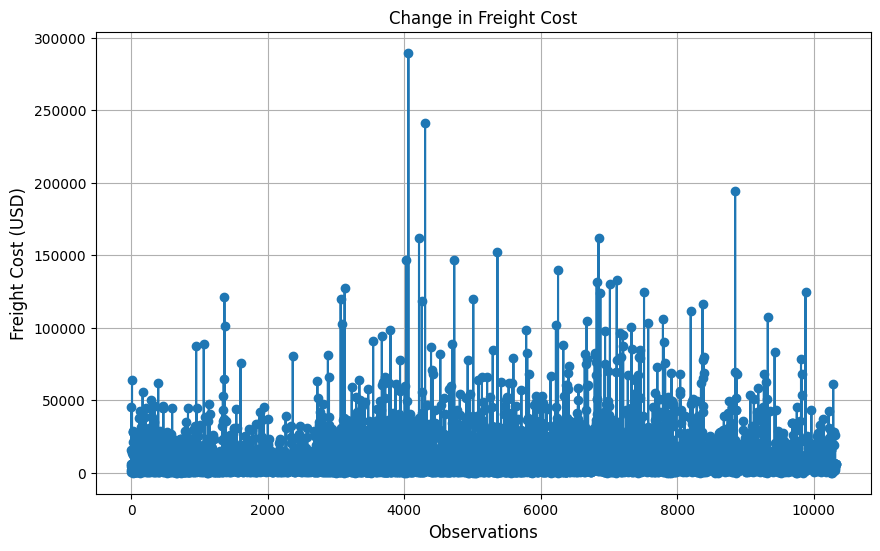

In [ ]:
#Here are some complementary codes for visualizing.

plt.figure(figsize = (10,6))
plt.xlabel ("Observations", fontsize =12)
plt.ylabel("Freight Cost (USD)", fontsize = 12)
plt.title("Change in Freight Cost")

#Write to code to have a graph of `Freight Cost (USD) over observations
#-------------------------------------------
plt.plot(df_new['Freight Cost (USD)'], marker='o')
plt.grid(True)  # Adding a grid for better readability
plt.show()




#-------------------------------------------

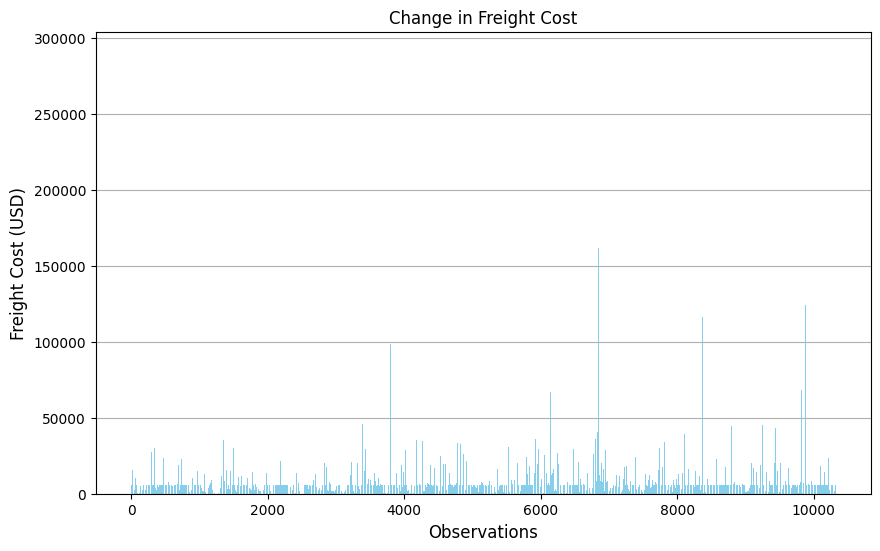

In [ ]:
#Here are some complementary codes for visualizing.

plt.figure(figsize = (10,6))
plt.xlabel ("Observations", fontsize =12)
plt.ylabel("Freight Cost (USD)", fontsize = 12)
plt.title("Change in Freight Cost")
plt.bar(df_new.index, df_new['Freight Cost (USD)'], color='skyblue')
plt.grid(True, axis='y')  # Adding a grid for the y-axis
plt.show()

To find the highest point or the outlier in the graph, `df[['col']].idmax` can be used. Check [here](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.idxmax.html) for more information.

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Check the max value of `Freight Cost (USD)` column with the function of `max()` and the index of this point with the function of `idmax()`.

In [ ]:
# Write the code to return max value of the column and the observation having the max value in the same column
#-------------------------------------------
max_value = df_new['Freight Cost (USD)'].max()
max_index = df_new['Freight Cost (USD)'].idxmax()
print(max_value)
print(max_index)
#-------------------------------------------



#-------------------------------------------

289653.2
4062


Let's check the entire row for one observation with the highest index by using `df.index`


In [ ]:
df_new[df_new.index == 4062]

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
4062,37835,PMO - US,Direct Drop,Air,HRDT,HIV test,Yes,1,28000,686000.0,24.5,18667.0,848.58,289653.2


It is possible to check the `Line Item Quantity` by grouping it regards to `Fulfill Via` categories to understand which fulfilling strategy has the higher amount by using `df.groupby().median()` function

In [ ]:
df_new.groupby('Fulfill Via')['Line Item Quantity'].median()

Fulfill Via
Direct Drop    1245.0
From RDC       6353.0
Name: Line Item Quantity, dtype: float64

To have some graphs will help you understand the behavior of the data. You may need to group some features to see a brief explanation for the dataframe. Check [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for visualization.

<ipython-input-50-007a84bc24a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df_new, x="Fulfill Via", y="Line Item Quantity", palette=["m", "g"])


<Axes: xlabel='Fulfill Via', ylabel='Line Item Quantity'>

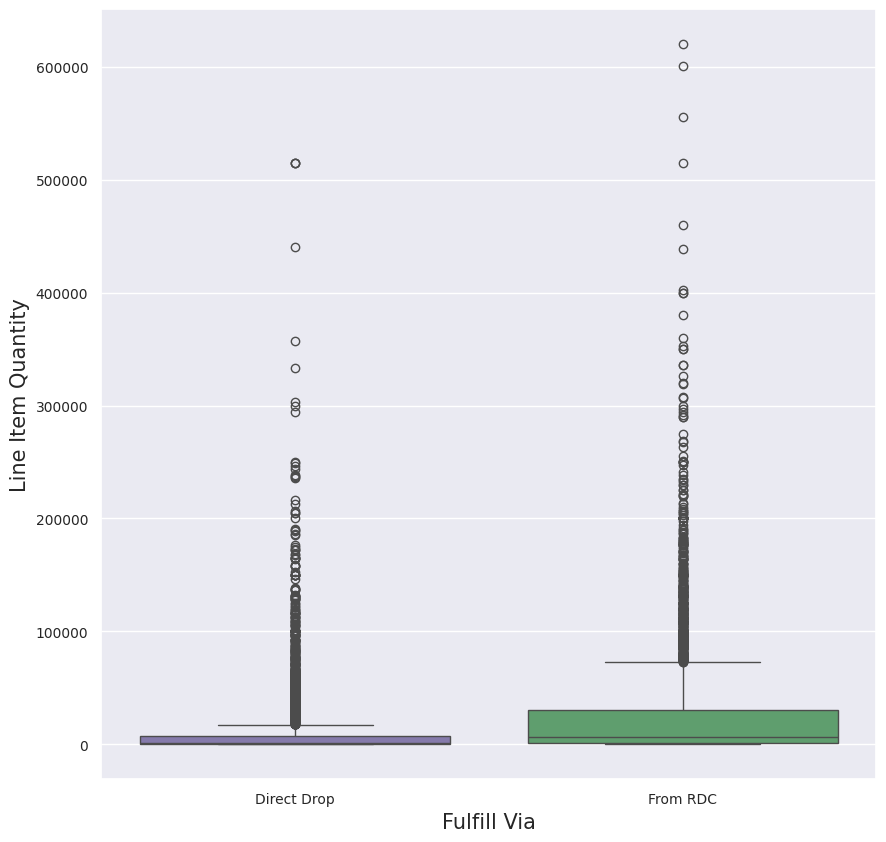

In [ ]:
#sns.set(style="ticks", palette="pastel")

sns.set(rc={'axes.grid':True,
            'axes.labelsize':15,
            'figure.figsize':(10,10),
            'xtick.labelsize':10,
            'ytick.labelsize':10})

sns.boxplot(data= df_new, x="Fulfill Via", y="Line Item Quantity", palette=["m", "g"])

#sns.despine(offset=10, trim=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Shipment Mode'] = le.fit_transform(df_new['Shipment Mode'])
df_new.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,PMO - US,Direct Drop,1,HRDT,HIV test,Yes,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,PMO - US,Direct Drop,1,ARV,Pediatric,Yes,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,PMO - US,Direct Drop,1,HRDT,HIV test,Yes,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,PMO - US,Direct Drop,1,ARV,Adult,Yes,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,PMO - US,Direct Drop,1,ARV,Adult,Yes,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Sub Classification'] = le.fit_transform(df_new['Sub Classification'])
df_new.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,PMO - US,Direct Drop,1,HRDT,2,Yes,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,PMO - US,Direct Drop,1,ARV,5,Yes,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,PMO - US,Direct Drop,1,HRDT,2,Yes,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,PMO - US,Direct Drop,1,ARV,1,Yes,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,PMO - US,Direct Drop,1,ARV,1,Yes,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Managed By'] = le.fit_transform(df_new['Managed By'])
df_new.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,2,Direct Drop,1,HRDT,2,Yes,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,2,Direct Drop,1,ARV,5,Yes,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,2,Direct Drop,1,HRDT,2,Yes,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,2,Direct Drop,1,ARV,1,Yes,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,2,Direct Drop,1,ARV,1,Yes,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Product Group'] = le.fit_transform(df_new['Product Group'])
df_new.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,2,Direct Drop,1,3,2,Yes,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,2,Direct Drop,1,2,5,Yes,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,2,Direct Drop,1,3,2,Yes,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,2,Direct Drop,1,2,1,Yes,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,2,Direct Drop,1,2,1,Yes,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['Fulfill Via'] = le.fit_transform(df_new['Fulfill Via'])
df_new.head()

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
0,1,2,0,1,3,2,Yes,30,19,551.0,0.97,13.0,240.117626,780.34
1,3,2,0,1,2,5,Yes,240,1000,6200.0,0.03,358.0,240.117626,4521.50
2,4,2,0,1,3,2,Yes,100,500,40000.0,0.80,171.0,240.117626,1653.78
3,15,2,0,1,2,1,Yes,60,31920,127360.8,0.07,1855.0,240.117626,16007.06
4,16,2,0,1,2,1,Yes,60,38000,121600.0,0.05,7590.0,240.117626,45450.08


<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Group the `Shipment Mode` regarding the median value of `Freight Cost (USD)` and visualize it by using `sns.boxplot()` function.

In [47]:
#Write the code which groups the "Shipment Mode" regarding "Weight (Kilograms)" and then check the boxplot graph.

#-------------------------------------------
df_new.groupby('Freight Cost (USD)')['Shipment Mode'].median()



#-------------------------------------------

Freight Cost (USD)
0.75         1.0
14.36        1.0
17.72        1.0
22.29        4.0
29.21        1.0
            ... 
161712.87    1.0
161962.32    1.0
194623.44    2.0
241407.27    1.0
289653.20    1.0
Name: Shipment Mode, Length: 5279, dtype: float64

Let's draw the barplot of `Shipment Mode` over `Freight Cost (USD)` via [sns.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html)

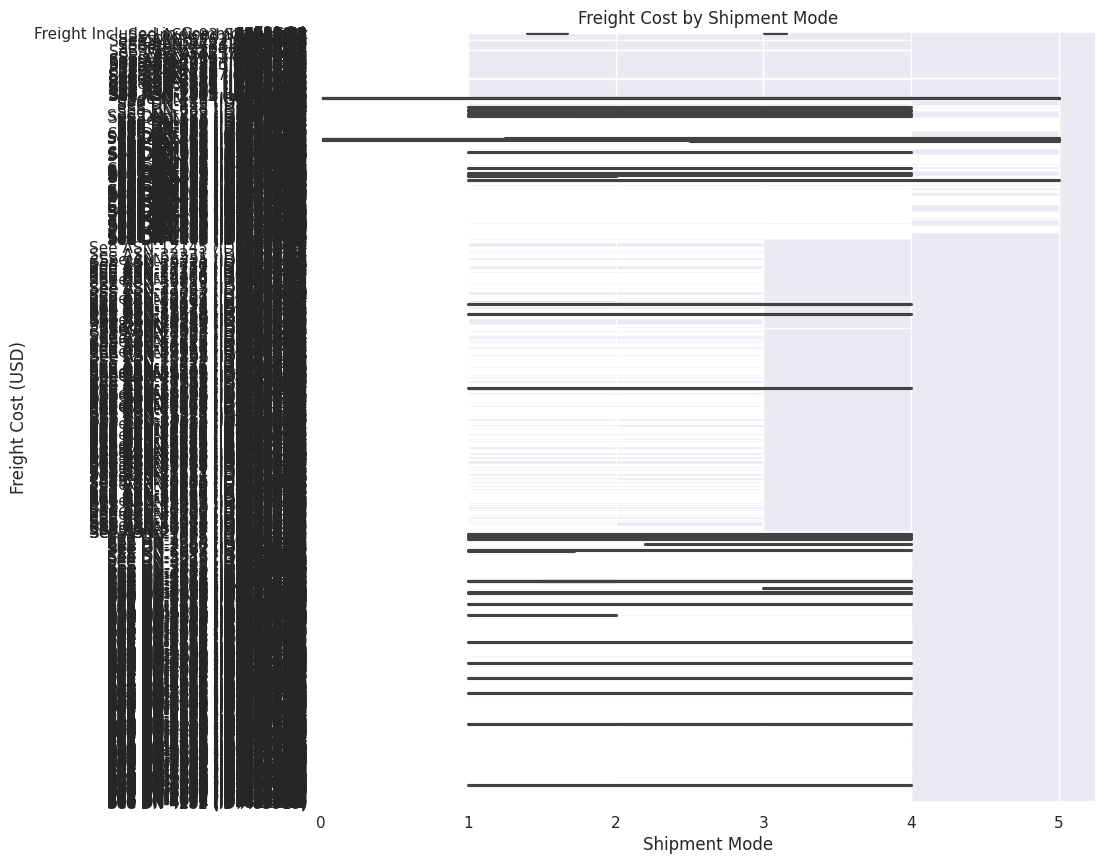

In [ ]:
#plt.show(sns.barplot(df_new['Shipment Mode'], df_new['Freight Cost (USD)']))
sns.barplot(df_new, x='Shipment Mode', y='Freight Cost (USD)')
plt.xlabel("Shipment Mode", fontsize=12)
plt.ylabel("Freight Cost (USD)", fontsize=12)
plt.title("Freight Cost by Shipment Mode")
plt.show()

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Draw the barplot of `Shipment Mode` over `Line Item Quantity` via `sns.barplot()`

In [ ]:
#Write the code which shows the behavior of "Shipment Mode" over "Line Item Quantity"
#-------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipment Mode', y='Line Item Quantity', data=df_new)
plt.xlabel("Shipment Mode", fontsize=12)
plt.ylabel("Line Item Quantity", fontsize=12)
plt.title("Line Item Quantity by Shipment Mode")
plt.show()

#-------------------------------------------

Let's try to find any other relation between our variables to get a feeling for the data. We begin with a correlation matrix and a heat map. Check the
[here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
sns.set()

# Compute the correlation matrix
corr = df_new.corr()

# (a) Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark")
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# (a) Drawing in upper triangle
sns.heatmap(corr, cmap=cmap, mask = mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

ValueError: could not convert string to float: 'PMO - US'

Here are the correlation mtrix to see the numeric correlation values for each column.

In [55]:
# Create correlation matrix
corr_matrix = df_new.corr()

corr_matrix

,ID,Managed By,Fulfill Via,Shipment Mode,Product Group,Sub Classification,First Line Designation,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Freight Cost (USD)
ID,1.000000,-0.001466,0.404459,0.281761,-0.211492,-0.040319,-0.092662,-0.079044,0.191730,0.136856,-0.097599,0.053006,0.103138,0.068840
Managed By,-0.001466,1.000000,-0.070159,0.106180,-0.038535,0.011427,-0.100446,0.016323,-0.028355,-0.026587,-0.012329,-0.009283,-0.029185,-0.017320
Fulfill Via,0.404459,-0.070159,1.000000,0.193294,-0.358238,-0.104928,-0.100936,-0.065905,0.177906,0.135017,-0.173763,0.055016,0.130366,-0.009721
Shipment Mode,0.281761,0.106180,0.193294,1.000000,-0.276062,-0.029704,-0.200817,-0.059914,0.226938,0.149376,-0.112860,0.075936,0.135138,-0.035765
Product Group,-0.211492,-0.038535,-0.358238,-0.276062,1.000000,0.048201,0.181564,-0.179716,-0.168711,-0.037393,0.351874,-0.024086,-0.037398,0.083733
Sub Classification,-0.040319,0.011427,-0.104928,-0.029704,0.048201,1.000000,0.003521,0.467161,-0.194747,-0.202089,-0.008957,-0.055863,-0.211997,-0.085925
First Line Designation,-0.092662,-0.100446,-0.100936,-0.200817,0.181564,0.003521,1.000000,0.005938,0.064586,0.096475,0.087024,0.093636,0.114745,0.173681
Unit of Measure (Per Pack),-0.079044,0.016323,-0.065905,-0.059914,-0.179716,0.467161,0.005938,1.000000,-0.149344,-0.125896,-0.136802,-0.030330,-0.127415,-0.046714
Line Item Quantity,0.191730,-0.028355,0.177906,0.226938,-0.168711,-0.194747,0.064586,-0.149344,1.000000,0.840032,-0.070288,0.307466,0.797727,0.324887
Line Item Value,0.136856,-0.026587,0.135017,0.149376,-0.037393,-0.202089,0.096475,-0.125896,0.840032,1.000000,-0.023959,0.310605,0.958435,0.376688


## To see a more elaborated relationships of paired features, `scatter matrix` is a good way to visualize it.

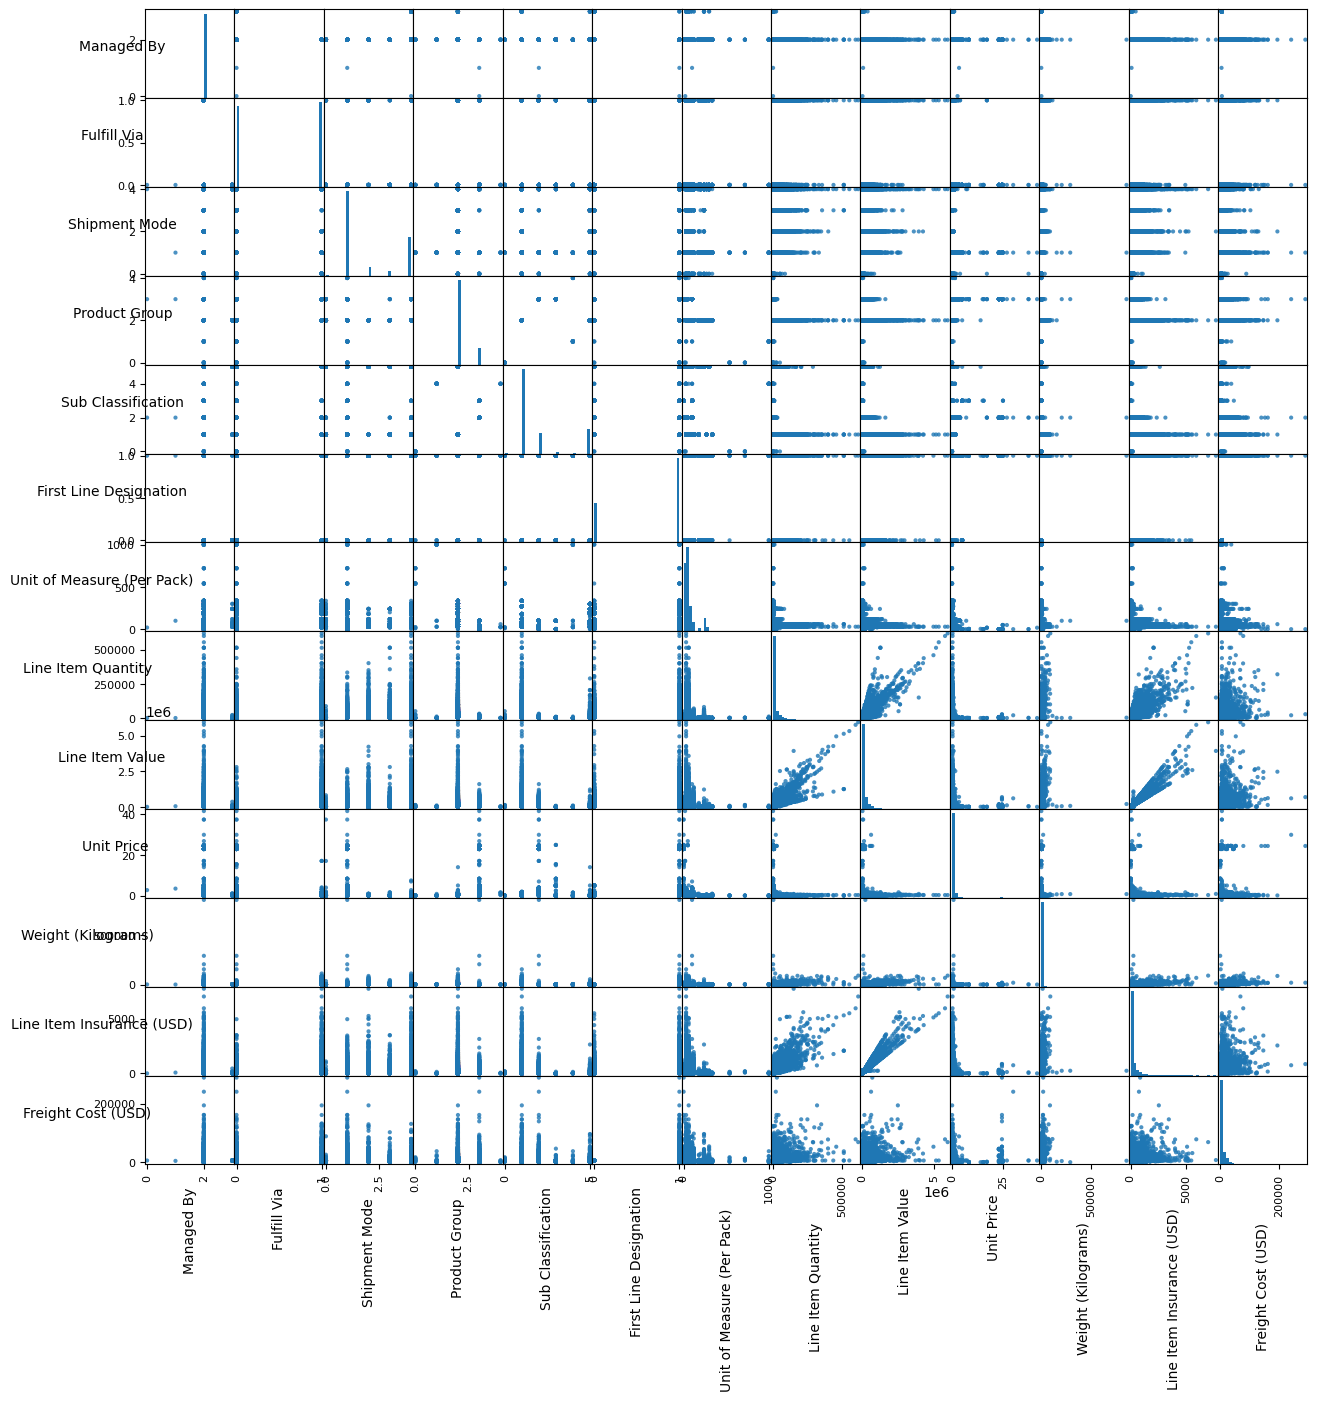

In [57]:
# @title Văn bản tiêu đề mặc định
from pandas.plotting import scatter_matrix

scatter_matrix = scatter_matrix(df_new.iloc[:, 1:], figsize=[15, 15], marker= ".", alpha=0.8, hist_kwds={'bins':30})


#adjusting the labels' font and position
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

To see the individual relationship between specific columns -as `Line Item Insurance (USD)` and `Line Item Value`- use `df.plot.scatter` function and show it below.

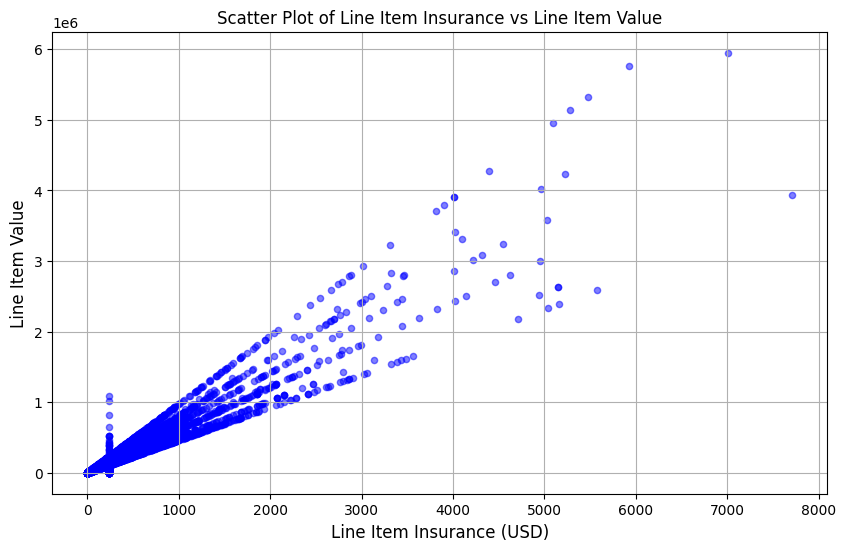

In [58]:
# Write the code here
#-------------------------------------------
df_new.plot.scatter(x='Line Item Insurance (USD)', y='Line Item Value', figsize=(10, 6), color='blue', alpha=0.5)
plt.xlabel("Line Item Insurance (USD)", fontsize=12)
plt.ylabel("Line Item Value", fontsize=12)
plt.title("Scatter Plot of Line Item Insurance vs Line Item Value")
plt.grid(True)
plt.show()


#-------------------------------------------

<h3><font color=darkred> Exercise - Do it yourself ! </font></h3>

> Find the the highest correlated columns in the table and drop that column with `df.drop()` to avoid from the multi-collinearity.


In [64]:
#Write the code here
#-------------------------------------------
# Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Select the upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df_new = df_new.drop(df_new[to_drop], axis=1)
df_new.head()
print(to_drop)
#-------------------------------------------

#-------------------------------------------

[]
